##Ejercicio 1: Tablas de Crecimiento

1. Descargar dataset en CSV Tablas de Peso Basado en material de https://www.cdc.gov/growthcharts/percentile_data_files.htm 

2. Graficar las curvas correspondientes a cada percentil para niños y niñas.

    a. En la columna Sex, 1 representa a niños y 2 a niñas. 
    
    b. Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo gráfico. 
    
    c. Un gráfico para cada sexo.


In [0]:
# Importación de las librerías necesarias


import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from gmplot import gmplot

In [2]:
# Cargamos el Dataset de A&V en una variable
url_data = 'https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/wtageinf.csv'
_ds_crecimiento = pd.read_csv(url_data, sep=',')
_ds_crecimiento.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878


**Información del dataset**

These files contain the L, M, and S parameters needed to generate exact percentiles and z-scores along with the percentile values for the 3rd, 5th, 10th, 25th, 50th, 75th, 90th, 95th, and 97th percentiles by sex (1=male; 2=female) and single month of age. The smoothed 85th percentile values are included in the BMI-for-age and weight-for-stature tables. Age is listed at the half month point for the entire month; for example, 1.5 months represents 1.0-1.99 months or 1.0 month up to but not including 2.0 months of age. The only exception is birth, which represents the point at birth. To obtain L, M, and S values at finer age or length/stature intervals interpolation could be used.

The LMS parameters are the median (M), the generalized coefficient of variation (S), and the power in the Box-Cox transformation (L). 

In [3]:
_ds_crecimiento.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [4]:
_ds_crecimiento_femenino = _ds_crecimiento[_ds_crecimiento['Sex']==2]
_ds_crecimiento_masculino = _ds_crecimiento[_ds_crecimiento['Sex']==1]
_ds_crecimiento_femenino.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
38,2,0.0,1.509188,3.399186,0.142107,2.414112,2.547905,2.747222,3.064865,3.399186,3.717519,3.992572,4.152637,4.254922
39,2,0.5,1.357944,3.797528,0.138076,2.756917,2.894442,3.101767,3.437628,3.797528,4.145594,4.450126,4.628836,4.743582
40,2,1.5,1.105538,4.544777,0.131734,3.402293,3.547610,3.770157,4.138994,4.544777,4.946766,5.305632,5.519169,5.657379
41,2,2.5,0.902597,5.230584,0.126893,3.997806,4.150639,4.387042,4.784820,5.230584,5.680083,6.087641,6.332837,6.492574
42,2,3.5,0.734121,5.859961,0.123025,4.547383,4.707123,4.955926,5.379141,5.859961,6.351512,6.802770,7.076723,7.256166


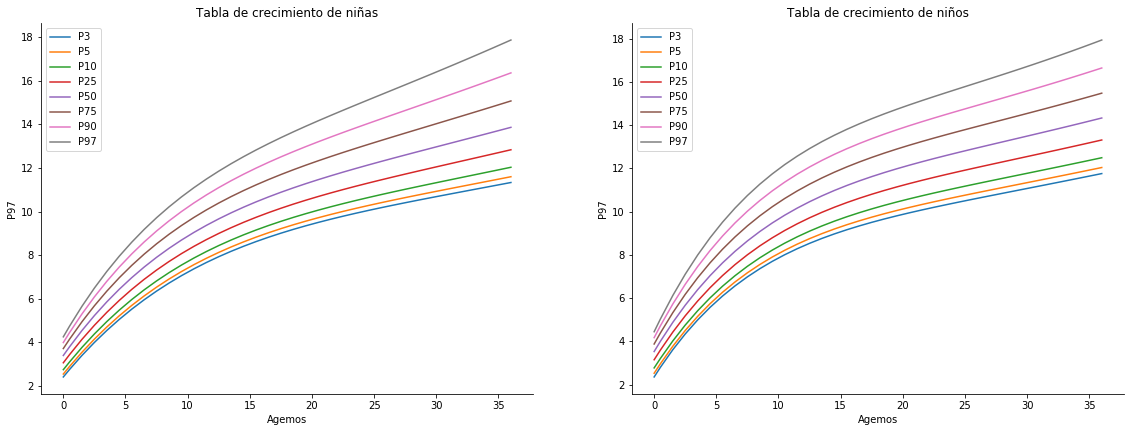

In [5]:
list_per =['P3','P5', 'P10','P25', 'P50','P75','P90', 'P97' ]
plt.figure(figsize=(30,15))
plt.subplot2grid((2,3),(0,0))
for x in list_per:
  sns.lineplot(x="Agemos", y=x, data=_ds_crecimiento_femenino,label=x)
plt.legend()
plt.title('Tabla de crecimiento de niñas')
sns.despine()
plt.subplot2grid((2,3),(0,1))
for x in list_per:
  sns.lineplot(x="Agemos", y=x, data=_ds_crecimiento_masculino,label=x)
plt.legend()
plt.title('Tabla de crecimiento de niños')
sns.despine()



##Ejercicio 2: Pasos Fronterizos

1. Descargar dataset en JSON: Pasos Fronterizos 

2. Graficar un histograma agrupando por valor del atributo “province”.

In [6]:
# Cargamos el Dataset de A&V en una variable
url_data = 'https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/pasos.json'
_ds_pasos_fronterizos = pd.read_json(url_data)
np.random.seed(0) # Por cuestiones de reproducibilidad establecemos la semilla del generador de aleatoriedad
_ds_pasos_fronterizos.sample(10)


,location,name,province
158,"[-26.8358881, -65.1105502]",AEROPUERTO INTERNACIONAL TENIENTE GENERAL BENJ...,Tucuman
83,"[-23.889444, -60.718889]",LAMADRID - M.S.LEONARDO,Buenos Aires
170,"[-27.8943996, -55.3555984]",PUERTO SANTA MARIA,Misiones
101,"[-34.473772, -57.8439708]",BUQUEBUS COLONIA,Buenos Aires
150,"[-30.2531458, -57.6365555]",PUERTO MONTE CASEROS,Corrientes
199,"[-24.8442303, -65.4806004]",AERO SALTA,Salta
118,"[-32.747416, -60.7356754]",PUERTO SAN LORENZO,Santa Fe
227,"[-37.9341161, -57.5745361]",AERO MAR DEL PLATA,Buenos Aires
63,"[-37.9341161, -57.5745361]",AERO MAR DEL PLATA,Buenos Aires
135,"[-32.2149531, -58.1378887]",PUERTO COLON,Santa Fe


In [7]:
_ds_pasos_fronterizos.head(15)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
5,"[-51.5866042, -72.3649779]",PASO DOROTEA,Santa Cruz
6,"[-51.2544488, -72.2652242]",PASO RIO DON GUILLERMO,Santa Cruz
7,"[-53.3229179, -68.6063227]",PASO SAN SEBASTIAN,Tierra del Fuego
8,"[-53.78438, -67.7173342]",TERMINAL RIO GRANDE,Tierra del Fuego
9,"[-53.7860374, -67.7002243]",PUERTO RIO GRANDE,Tierra del Fuego


In [8]:
_ds_pasos_fronterizos.shape

(252, 3)

In [9]:
_ds_pasos_fronterizos.dtypes

location    object
name        object
province    object
dtype: object

**Observaciones**

Haciendo un groupby por provincia se observan algunas irregularidades:

*   Repeticion de provincias por errores ortograficos o porque estan escritas de manera distinta (por ejemplo, NEUQUEN y neuquen).
*   Nombres de provincias que no coinciden con la realidad (por ejemplo, AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ).
*  Pasos fronterizos repetidos (por ejemplo en chubut).



In [10]:
_ds_pasos_fronterizos.groupby('province').count().sort_values('province')

,location,name
province,,
AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ,1,1
Buenos Aires,48,48
Catamarca,3,3
Chaco,3,3
Chubut,15,15
Cordoba,3,3
Corrientes,15,15
Córdoba,1,1
Entre Rios,13,13


**Provincias que no existen en la realidad.**

Existe un registro cuya provincia dice ser "AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ	", que es el aeropuerto que se encuentra en Rio Gallegos, provincia de Santa Cruz. Si observamos los registros filtrados por provincia igual a Santa Cruz, observamos otro registro que tiene de nombre Aero Rio Gallegos, que tiene misma location. Por lo que se decide eliminar el registro que tiene asignado la provincia erroneamente.

In [11]:
ds_santa_cruz_aer = _ds_pasos_fronterizos[_ds_pasos_fronterizos['province']=='AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ']
ds_santa_cruz = _ds_pasos_fronterizos[_ds_pasos_fronterizos['province']=='Santa Cruz']
ds_santa_cruz = pd.concat([ds_santa_cruz, ds_santa_cruz_aer]) 
ds_santa_cruz[ds_santa_cruz['name']=='AERO RIO GALLEGOS']

,location,name,province
14,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,Santa Cruz
15,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...


In [12]:
# dataset sin province == AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ 
_ds_pasos_fronterizos_edited = _ds_pasos_fronterizos[_ds_pasos_fronterizos['province']!='AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ']
_ds_pasos_fronterizos_edited.groupby('province').count().sort_values('province').count()

location    24
name        24
dtype: int64

**Solución al problema de repetición de provincias**




In [13]:

_ds_pf = _ds_pasos_fronterizos_edited.copy()

# Sacamos acentos para evitar duplicados por provincia
_ds_pf['province'] = _ds_pf['province'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


# Normalizamos la escritura de la provincia (primera letra de cada palabra upper, demas lower case)
_ds_pf['province'] = _ds_pf['province'].str.title()


# Verificacion de agrupacion correcta
_ds_pf.groupby('province').count().sort_values('province')

#Eliminamos duplicados por location (eliminacion de duplicados mas exacta)
_ds_pf_dup_loc = _ds_pf[~_ds_pf['location'].apply(pd.Series).duplicated()]


#verificamos si todavia quedan duplicados debido a que el location es distinto 
_ds_pf_dup_loc[_ds_pf_dup_loc.name.duplicated(keep=False)].sort_values('name')

# Eliminamos el duplicado
_ds_pf_dup_loc = _ds_pf_dup_loc.drop_duplicates(subset='name', keep='first')


#Verificamos
_ds_pf_dup_loc.head(10)


,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra Del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra Del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra Del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra Del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
5,"[-51.5866042, -72.3649779]",PASO DOROTEA,Santa Cruz
6,"[-51.2544488, -72.2652242]",PASO RIO DON GUILLERMO,Santa Cruz
7,"[-53.3229179, -68.6063227]",PASO SAN SEBASTIAN,Tierra Del Fuego
8,"[-53.78438, -67.7173342]",TERMINAL RIO GRANDE,Tierra Del Fuego
9,"[-53.7860374, -67.7002243]",PUERTO RIO GRANDE,Tierra Del Fuego


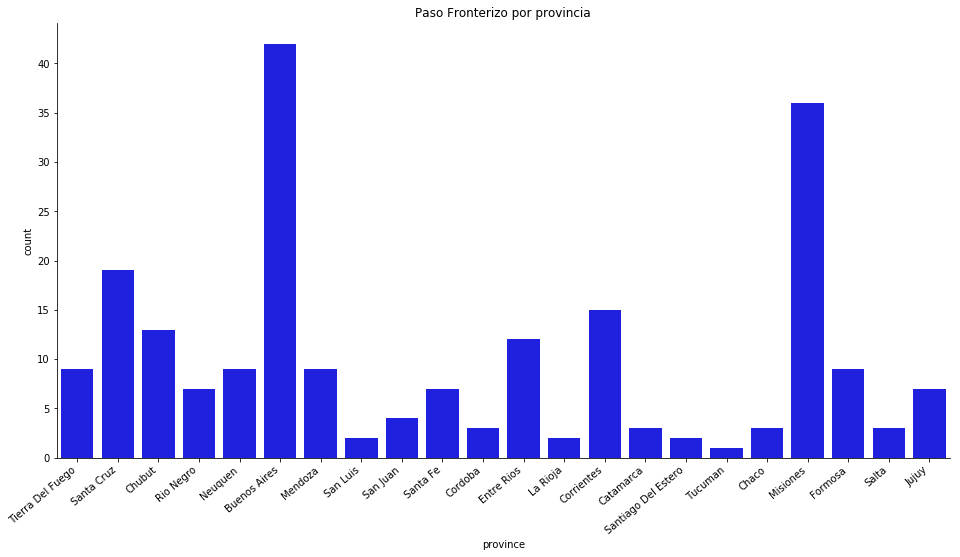

In [14]:
plt.figure(figsize=(16,8))

ax = sns.countplot(x="province", data=_ds_pf_dup_loc, color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Paso Fronterizo por provincia')
#plt.legend()
sns.despine()
